# 1. Апостериорное распределение для параметра распределения Пуассона

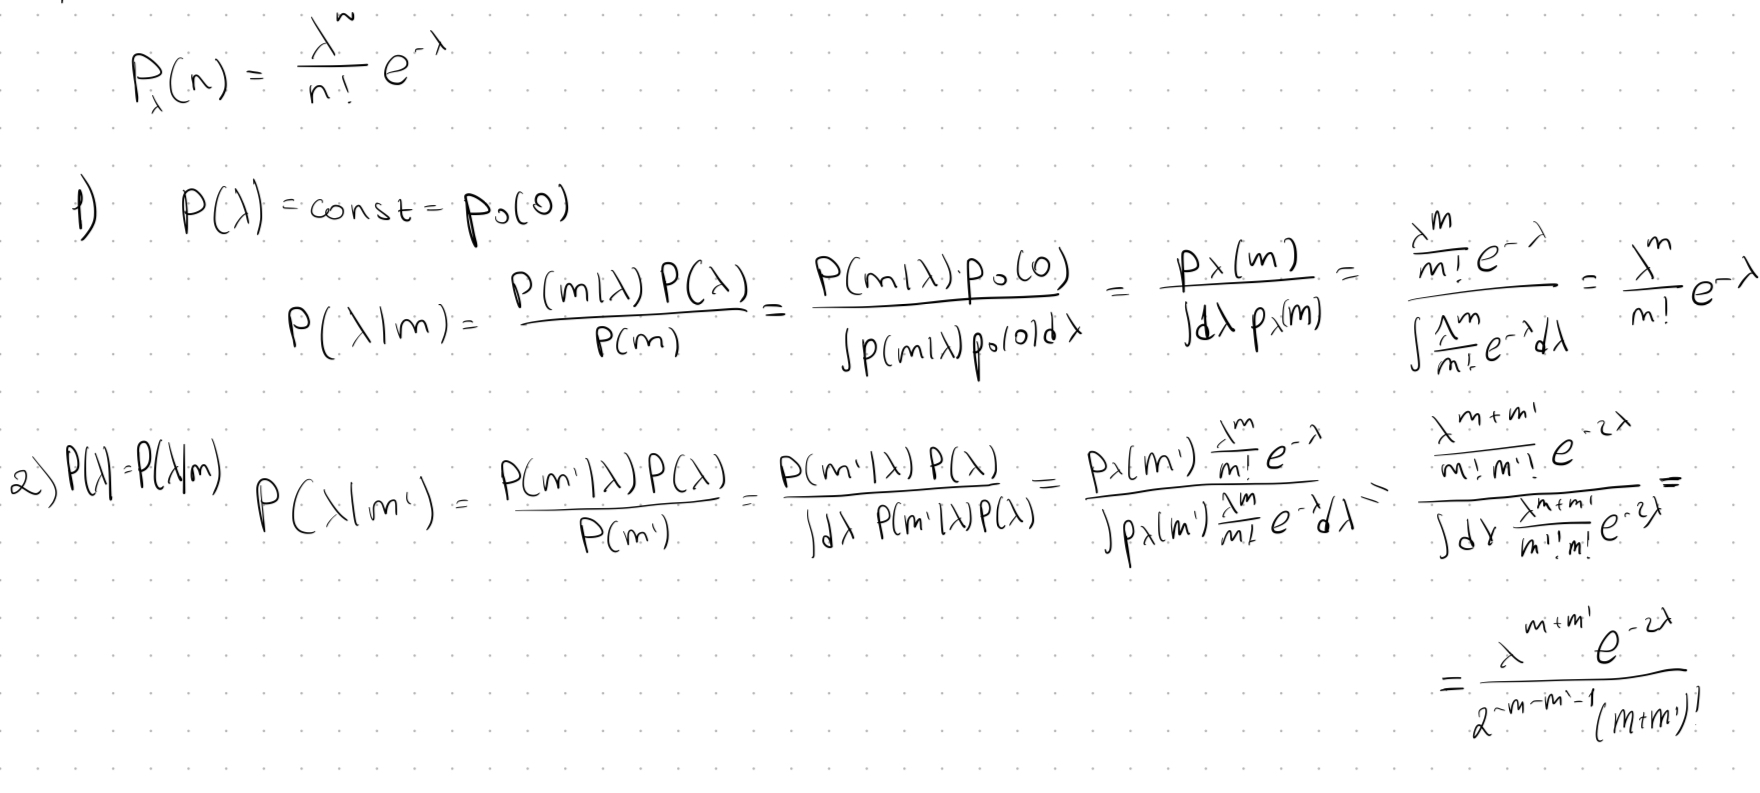

# 2. Апостериорное распределение для аргумента нормального распределения

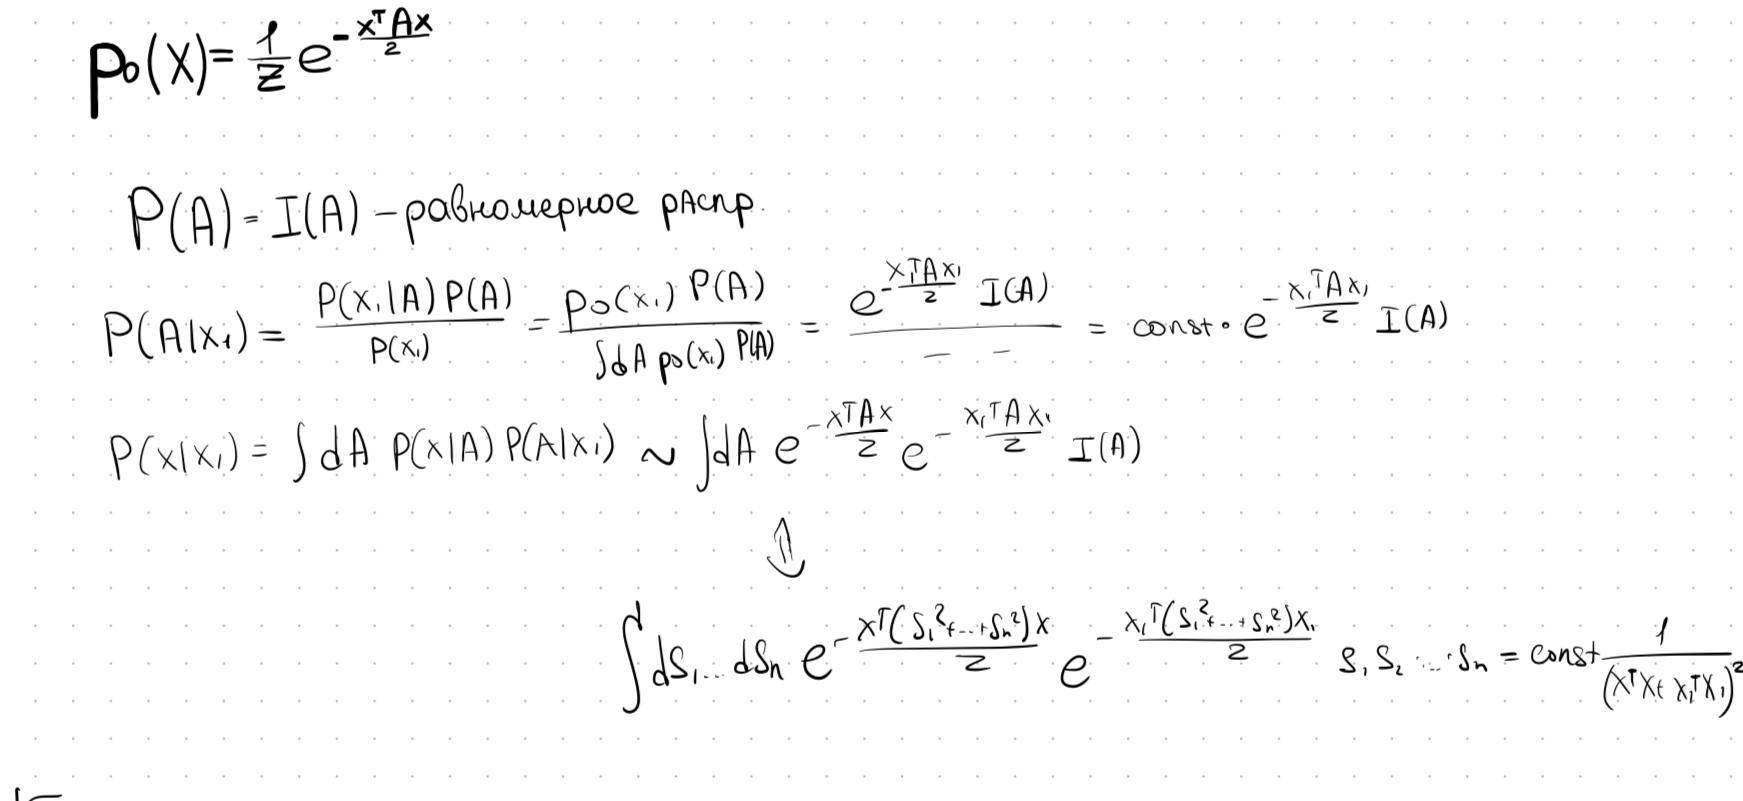

# 3. L1-регуляризация

(442, 10)


/var/folders/pp/mwb40zv519zbg002_qh26rb40000gn/T/ipykernel_30679/2222923541.py:23: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  lm.fit(data, target)
/Users/vadimlopatkin/opt/anaconda3/envs/qml/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
/Users/vadimlopatkin/opt/anaconda3/envs/qml/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.320e+05, tolerance: 2.621e+02 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ri

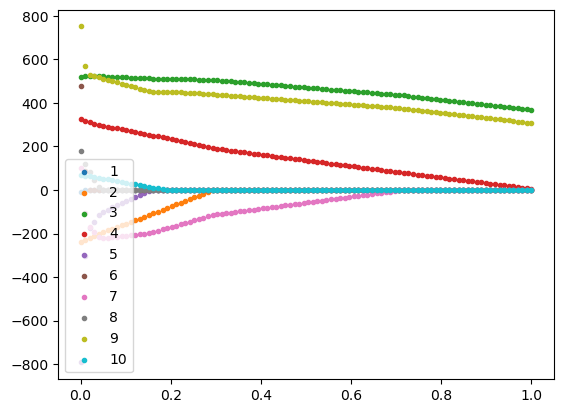

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_diabetes
from sklearn.linear_model import Lasso

data, target = load_diabetes(return_X_y=True)
print(data.shape)
a = 1e-6
alpha_linspace = np.linspace(a, 1, 200)
xs = np.linspace(0,1,100)
ys0 = []
ys1 = []
ys2 = []
ys3 = []
ys4 = []
ys5 = []
ys6 = []
ys7 = []
ys8 = []
ys9 = []
for i in xs:
  lm = Lasso(i)
  lm.fit(data, target)
  values = lm.coef_
  ys0.append([values[0]])
  ys1.append([values[1]])
  ys2.append([values[2]])
  ys3.append([values[3]])
  ys4.append([values[4]])
  ys5.append([values[5]])
  ys6.append([values[6]])
  ys7.append([values[7]])
  ys8.append([values[8]])
  ys9.append([values[9]])
plt.scatter(xs,ys0,label='1', marker='.')
plt.scatter(xs,ys1,label='2', marker='.')
plt.scatter(xs,ys2,label='3', marker='.')
plt.scatter(xs,ys3,label='4', marker='.')
plt.scatter(xs,ys4,label='5', marker='.')
plt.scatter(xs,ys5,label='6', marker='.')
plt.scatter(xs,ys6,label='7', marker='.')
plt.scatter(xs,ys7,label='8', marker='.')
plt.scatter(xs,ys8,label='9', marker='.')
plt.scatter(xs,ys9,label='10', marker='.')
plt.legend()
plt.show()

# 4. K-fold кроссвалидация и L1-регуляризация градиентным спуском

Fitting 5 folds for each of 27 candidates, totalling 135 fits


/Users/vadimlopatkin/opt/anaconda3/envs/qml/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.238e-02, tolerance: 1.179e-02
  model = cd_fast.enet_coordinate_descent(
/Users/vadimlopatkin/opt/anaconda3/envs/qml/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.344e-02, tolerance: 1.179e-02
  model = cd_fast.enet_coordinate_descent(
/Users/vadimlopatkin/opt/anaconda3/envs/qml/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the sca

Best hyperparameters found: {'alpha': 0.001, 'max_iter': 1000}
Best cross-validation score: 0.0017482785993993906


/Users/vadimlopatkin/opt/anaconda3/envs/qml/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.197e-02, tolerance: 1.173e-02
  model = cd_fast.enet_coordinate_descent(


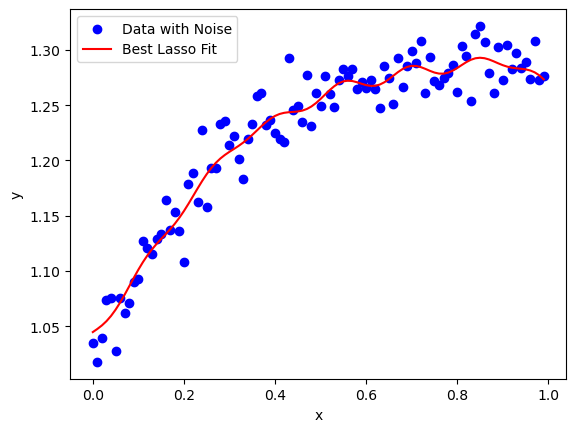

In [37]:
import numpy as np
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Generate synthetic data
np.random.seed(0)
xs = np.arange(0, 1, 0.01).reshape((-1, 1))
noise = np.random.normal(0., 0.02, size=xs.shape[0]).reshape((-1, 1))
ys = np.sin(xs) + np.sin(xs**2) + np.cos(2*xs) + noise

# Function to create feature matrix with sine transformations
def make_sin_matrix(x, max_order):
    X = np.ones(x.shape)
    for k in range(1, max_order + 1):
        X = np.concatenate([X, np.sin(k * x)], axis=1)
    return X

# Create feature matrix with sine transformations up to order 50
X = make_sin_matrix(xs, 50)

# Define hyperparameters for grid search
hyperparams = {
    'alpha': [1e-1, 1e-2, 1e-3, 1e-4, 1e-5, 1e-6, 1e-7, 1e-8, 1e-9],
    'max_iter': [1000, 10000, 100000]
}

# Initialize Lasso model
model = Lasso(fit_intercept=False, warm_start=False)

# Set up GridSearchCV with 5-fold cross-validation
gs = GridSearchCV(estimator=model, 
                  param_grid=hyperparams, 
                  cv=5, 
                  scoring='neg_mean_squared_error', 
                  verbose=1,
                  return_train_score=True)

# Fit model using grid search
gs.fit(X, ys)

# Best parameters and model evaluation
print("Best hyperparameters found:", gs.best_params_)
print("Best cross-validation score:", -gs.best_score_)  # convert to positive for MSE

# Plot the results
plt.scatter(xs, ys, color='blue', label='Data with Noise')
plt.plot(xs, gs.predict(X), color='red', label='Best Lasso Fit')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

# 5. Лассо Тибширани: связь L1 и L2 между собой

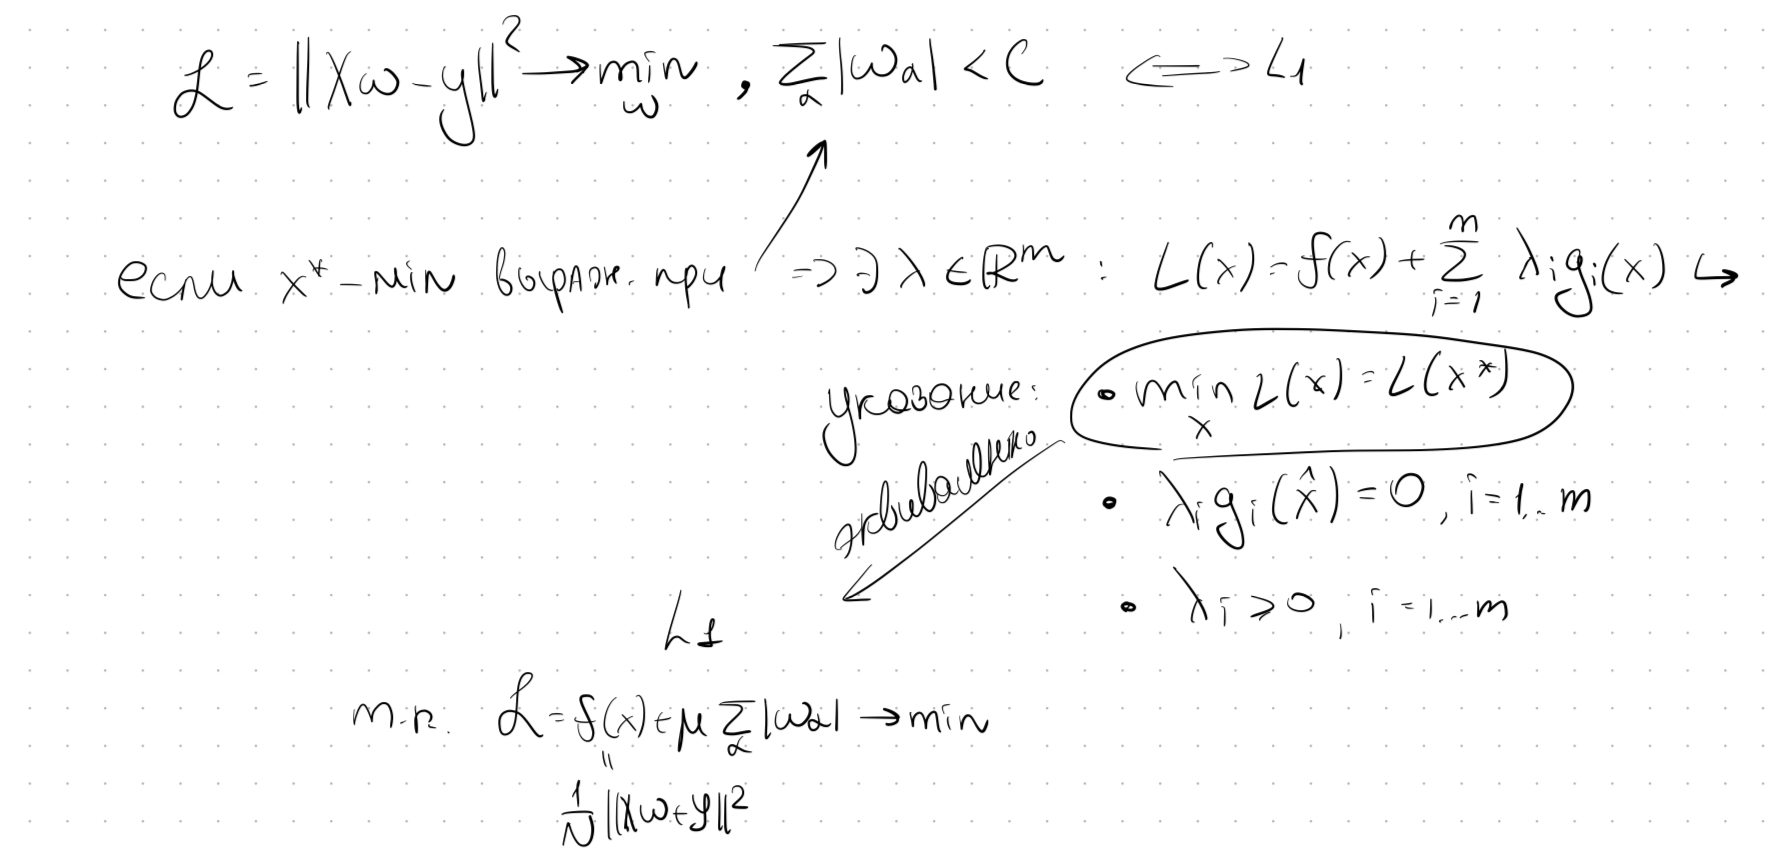

#  6*.  Bias-Variance decomposition

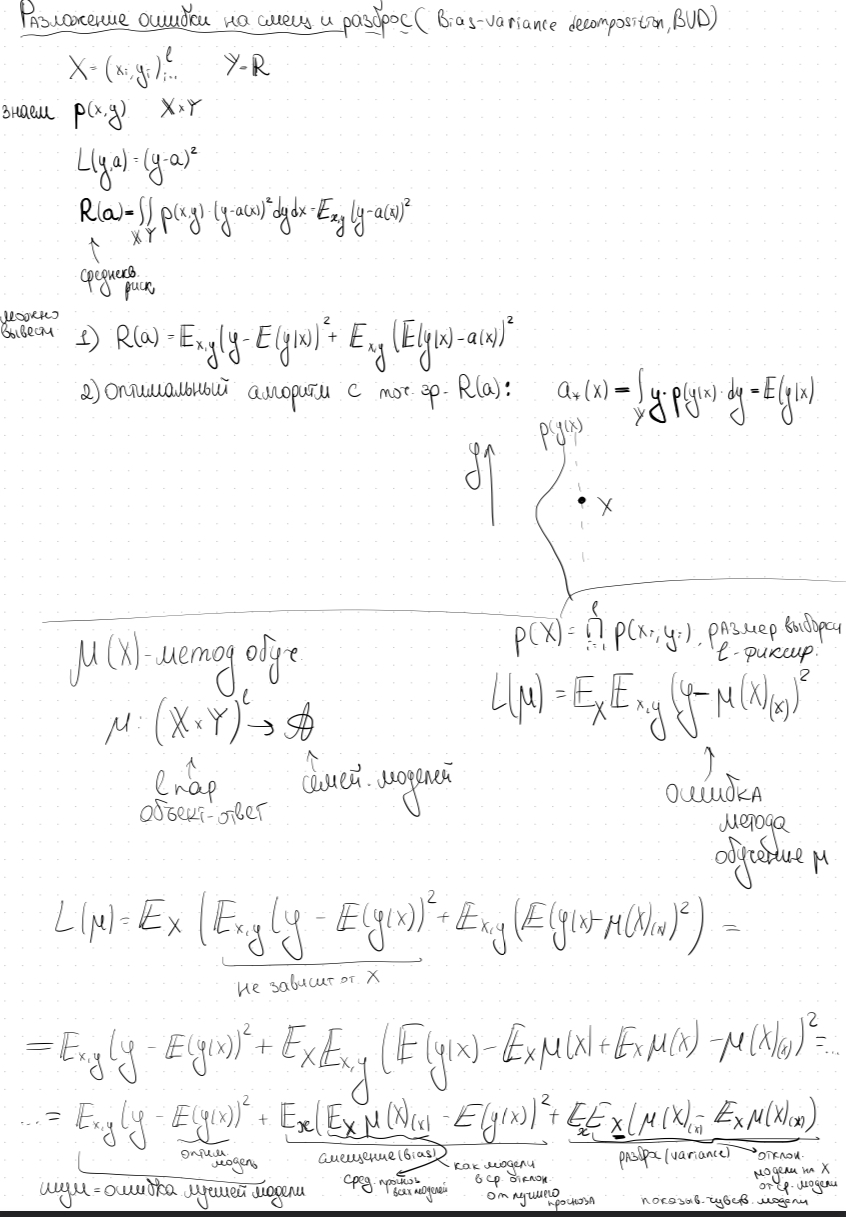